**About the dataset: This dataset contains information about the credit landscape (credit loan provided to customers) of a large Singapore bank.**

**The Goal: Predict whether the customer will default or not in the credit payment (credit loan
payment).**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
data=pd.read_csv(r"E:\MLCOE\Raw_Data_Singapore Credit Dataset.csv")

In [22]:
data

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 SGD,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 SGD,30,good,car,3857,< 100 SGD,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 SGD,45,good,furniture/appliances,1845,< 100 SGD,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


# Null Counts

In [23]:
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [24]:
data.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

# EDA

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [26]:
data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [35]:
## target variable

default_counts=data['default'].value_counts()
default_counts

no     700
yes    300
Name: default, dtype: int64

In [28]:
##counting

data['checking_balance'].value_counts()

unknown        394
< 0 SGD        274
1 - 200 SGD    269
> 200 SGD       63
Name: checking_balance, dtype: int64

In [37]:
credit_history_counts=data['credit_history'].value_counts()
credit_history_counts

good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64

In [30]:
data['savings_balance'].value_counts()

< 100 SGD         603
unknown           183
100 - 500 SGD     103
500 - 1000 SGD     63
> 1000 SGD         48
Name: savings_balance, dtype: int64

In [41]:
years_at_residence_counts=data['years_at_residence'].value_counts()
years_at_residence_counts

4    413
2    308
3    149
1    130
Name: years_at_residence, dtype: int64

In [31]:
data_age=pd.pivot_table(data,index=["default", "age","checking_balance"])

C:\Users\wwwpr\AppData\Local\Temp\ipykernel_15404\551842983.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  data_age=pd.pivot_table(data,index=["default", "age","checking_balance"])


In [32]:
data_age

amount  dependents  existing_loans_count  \
default age checking_balance                                                   
no      19  1 - 200 SGD         983.000000         1.0              1.000000   
        20  1 - 200 SGD        1376.333333         1.0              1.333333   
            < 0 SGD            1107.000000         2.0              1.000000   
            > 200 SGD          3617.000000         1.0              2.000000   
            unknown            2848.750000         1.0              1.000000   
...                                    ...         ...                   ...   
yes     66  1 - 200 SGD         766.000000         1.0              1.000000   
            > 200 SGD          1908.000000         1.0              1.000000   
        68  < 0 SGD           14896.000000         1.0              1.000000   
            unknown            6761.000000         1.0              2.000000   
        74  1 - 200 SGD        5129.000000         2.0              1.000000   

                              months_loan_duration  percent_of_income  \
default age checking_balance                                            
no      19  1 - 200 SGD                  12.000000                1.0   
        20  1 - 200 SGD                  15.666667                4.0   
            < 0 SGD                      12.000000                2.0   
            > 200 SGD                    24.000000                4.0   
            unknown                      12.750000                1.5   
...                                            ...                ...   
yes     66  1 - 200 SGD                  12.000000                4.0   
            > 200 SGD                    30.000000                4.0   
        68  < 0 SGD                       6.000000                1.0   
            unknown                      18.000000                2.0   
        74  1 - 200 SGD                   9.000000                2.0   

                              years_at_residence  
default age checking_balance                      
no      19  1 - 200 SGD                     4.00  
        20  1 - 200 SGD                     3.00  
            < 0 SGD                         2.00  
            > 200 SGD                       4.00  
            unknown                         3.75  
...                                          ...  
yes     66  1 - 200 SGD                     3.00  
            > 200 SGD                       4.00  
        68  < 0 SGD                         4.00  
            unknown                         4.00  
        74  1 - 200 SGD                     4.00  

[273 rows x 6 columns]

<Axes: xlabel='credit_history', ylabel='count'>

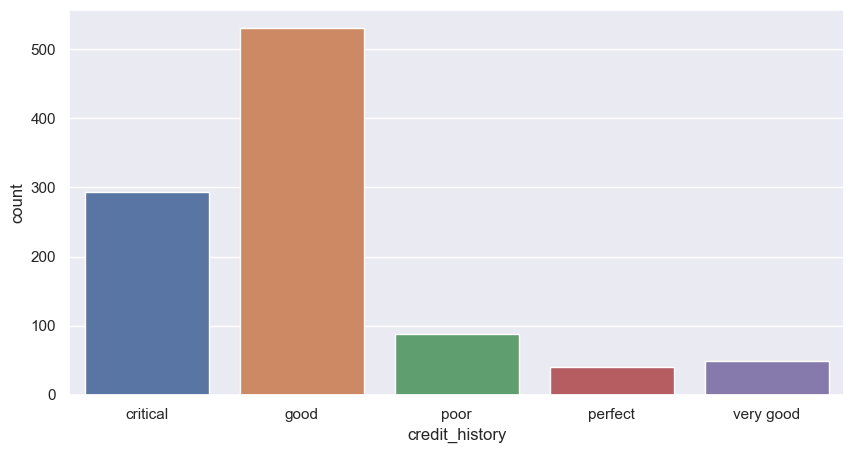

In [33]:
##Count plot
sns.set(rc={'figure.figsize':(10,5
                             )})


sns.countplot(x='credit_history',data=data)


<Axes: xlabel='employment_duration', ylabel='count'>

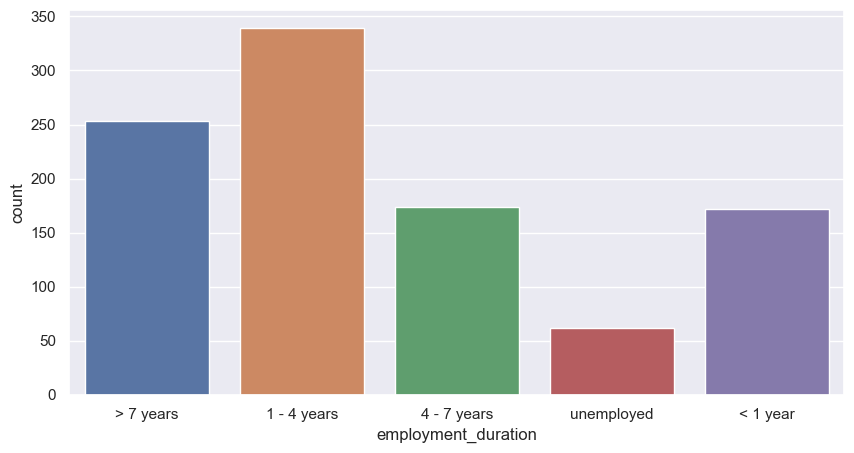

In [34]:
sns.set(rc={'figure.figsize':(10,5
                             )})


sns.countplot(x='employment_duration',data=data)

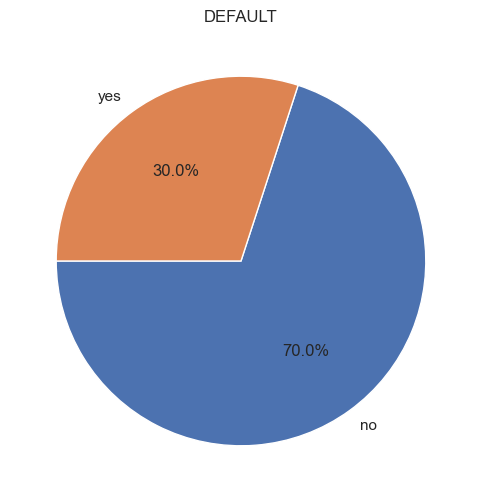

In [36]:
### A pie chart would be great way to visualize the distribution

plt.figure(figsize=(12,6))
plt.title("DEFAULT")
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=180);

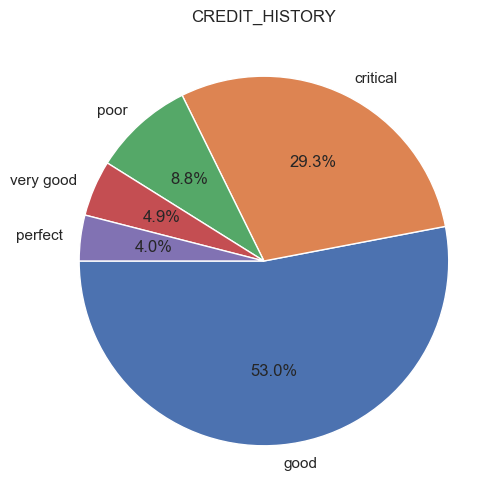

In [38]:
plt.figure(figsize=(12,6))
plt.title("CREDIT_HISTORY")
plt.pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=180);

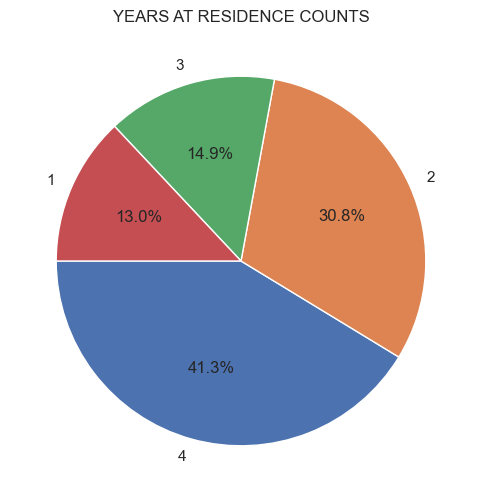

In [42]:
plt.figure(figsize=(12,6))
plt.title("YEARS AT RESIDENCE COUNTS")
plt.pie(years_at_residence_counts, labels=years_at_residence_counts.index, autopct='%1.1f%%', startangle=180);

# Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
train_val_df,test_df=train_test_split(data,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [45]:
print('train_df.shape :',train_df.shape)
print('val_df.shape :',val_df.shape)
print('test_df.shape :',test_df.shape)

train_df.shape : (600, 17)
val_df.shape : (200, 17)
test_df.shape : (200, 17)


In [48]:
input_cols = list(train_df.columns)[0:-1]
target_col = 'default'

In [49]:
print(input_cols)

['checking_balance', 'months_loan_duration', 'credit_history', 'purpose', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'other_credit', 'housing', 'existing_loans_count', 'job', 'dependents', 'phone']


In [50]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [51]:
val_inputs =val_df[input_cols].copy()
val_targets =val_df[target_col].copy()

In [52]:
test_inputs =test_df[input_cols].copy()
test_targets =test_df[target_col].copy()

In [57]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [58]:
numeric_cols

['months_loan_duration',
 'amount',
 'percent_of_income',
 'years_at_residence',
 'age',
 'existing_loans_count',
 'dependents']

In [59]:
categorical_cols

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing',
 'job',
 'phone']

In [61]:
train_inputs[categorical_cols].nunique()

checking_balance       4
credit_history         5
purpose                6
savings_balance        5
employment_duration    5
other_credit           3
housing                3
job                    4
phone                  2
dtype: int64

# Scaling values to the (0,1)

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
scaler = MinMaxScaler()

In [74]:
## we fit the scaler to the data i.e. compute the range of values for each column
scl=scaler.fit(data[numeric_cols])

In [75]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[4.0, 250.0, 1.0, 1.0, 19.0, 1.0, 1.0]

In [76]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[72.0, 18424.0, 4.0, 4.0, 75.0, 4.0, 2.0]

In [80]:
## we can now separately scale the training,validation and test sets using the transform method

train_inputs[numeric_cols] = scl.fit_transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] =  scl.fit_transform(val_inputs[numeric_cols]) 
test_inputs[numeric_cols] =    scl.fit_transform(test_inputs[numeric_cols])

In [83]:
train_inputs[numeric_cols].describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.313185,0.173662,0.666111,0.613333,0.305273,0.142778,0.145000
std,0.218645,0.167254,0.371244,0.370654,0.205923,0.194011,0.352395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.059135,0.333333,0.333333,0.145455,0.000000,0.000000
50%,0.250000,0.111603,0.666667,0.666667,0.263636,0.000000,0.000000
75%,0.410714,0.218391,1.000000,1.000000,0.418182,0.333333,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
## Encoding categorical columns as one-hot vectors

from sklearn.preprocessing import OneHotEncoder

In [85]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

In [86]:
encoder.fit(data[categorical_cols])

C:\Users\wwwpr\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [88]:
encoder.categories_

[array(['1 - 200 SGD', '< 0 SGD', '> 200 SGD', 'unknown'], dtype=object),
 array(['critical', 'good', 'perfect', 'poor', 'very good'], dtype=object),
 array(['business', 'car', 'car0', 'education', 'furniture/appliances',
        'renovations'], dtype=object),
 array(['100 - 500 SGD', '500 - 1000 SGD', '< 100 SGD', '> 1000 SGD',
        'unknown'], dtype=object),
 array(['1 - 4 years', '4 - 7 years', '< 1 year', '> 7 years',
        'unemployed'], dtype=object),
 array(['bank', 'none', 'store'], dtype=object),
 array(['other', 'own', 'rent'], dtype=object),
 array(['management', 'skilled', 'unemployed', 'unskilled'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [91]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['checking_balance_1 - 200 SGD', 'checking_balance_< 0 SGD', 'checking_balance_> 200 SGD', 'checking_balance_unknown', 'credit_history_critical', 'credit_history_good', 'credit_history_perfect', 'credit_history_poor', 'credit_history_very good', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'savings_balance_100 - 500 SGD', 'savings_balance_500 - 1000 SGD', 'savings_balance_< 100 SGD', 'savings_balance_> 1000 SGD', 'savings_balance_unknown', 'employment_duration_1 - 4 years', 'employment_duration_4 - 7 years', 'employment_duration_< 1 year', 'employment_duration_> 7 years', 'employment_duration_unemployed', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'housing_other', 'housing_own', 'housing_rent', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled', 'phone_no', 'phone_yes']


In [98]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [101]:
pd.set_option('display.max_columns', None)

In [102]:
test_inputs

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,checking_balance_1 - 200 SGD,checking_balance_< 0 SGD,checking_balance_> 200 SGD,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_car0,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 SGD,savings_balance_500 - 1000 SGD,savings_balance_< 100 SGD,savings_balance_> 1000 SGD,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
521,< 0 SGD,0.205882,good,furniture/appliances,0.199316,< 100 SGD,1 - 4 years,0.333333,0.333333,0.083333,none,own,0.000000,skilled,0.0,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
737,< 0 SGD,0.205882,good,car,0.280711,100 - 500 SGD,1 - 4 years,0.666667,1.000000,0.312500,none,own,0.000000,unskilled,1.0,yes,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
740,< 0 SGD,0.294118,very good,car,0.140150,100 - 500 SGD,4 - 7 years,0.333333,0.666667,0.250000,bank,own,0.000000,skilled,0.0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
660,> 200 SGD,0.117647,good,furniture/appliances,0.069836,< 100 SGD,1 - 4 years,0.666667,1.000000,0.062500,none,rent,0.000000,skilled,0.0,no,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
411,unknown,0.426471,critical,car,0.477223,< 100 SGD,4 - 7 years,0.666667,0.333333,0.312500,none,own,0.333333,management,0.0,yes,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,unknown,0.294118,good,furniture/appliances,0.202394,500 - 1000 SGD,> 7 years,0.666667,0.333333,0.125000,none,own,0.000000,management,0.0,yes,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
332,1 - 200 SGD,0.823529,good,car,0.487825,100 - 500 SGD,< 1 year,1.000000,0.333333,0.083333,none,own,0.000000,management,0.0,no,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
208,< 0 SGD,0.294118,good,business,0.430369,< 100 SGD,1 - 4 years,0.333333,0.333333,0.020833,store,own,0.000000,unskilled,0.0,no,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
613,< 0 SGD,0.294118,very good,car,0.229549,< 100 SGD,1 - 4 years,0.000000,1.000000,0.041667,bank,rent,0.000000,skilled,0.0,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


# Model Development 

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
reg=LogisticRegression(solver='liblinear')

In [105]:
reg.fit(train_inputs[numeric_cols + encoded_cols],train_targets)

LogisticRegression(solver='liblinear')

In [106]:
print(numeric_cols + encoded_cols)

['months_loan_duration', 'amount', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents', 'checking_balance_1 - 200 SGD', 'checking_balance_< 0 SGD', 'checking_balance_> 200 SGD', 'checking_balance_unknown', 'credit_history_critical', 'credit_history_good', 'credit_history_perfect', 'credit_history_poor', 'credit_history_very good', 'purpose_business', 'purpose_car', 'purpose_car0', 'purpose_education', 'purpose_furniture/appliances', 'purpose_renovations', 'savings_balance_100 - 500 SGD', 'savings_balance_500 - 1000 SGD', 'savings_balance_< 100 SGD', 'savings_balance_> 1000 SGD', 'savings_balance_unknown', 'employment_duration_1 - 4 years', 'employment_duration_4 - 7 years', 'employment_duration_< 1 year', 'employment_duration_> 7 years', 'employment_duration_unemployed', 'other_credit_bank', 'other_credit_none', 'other_credit_store', 'housing_other', 'housing_own', 'housing_rent', 'job_management', 'job_skilled', 'job_unemployed', 'job_unskilled', 'ph

In [108]:
print(reg.coef_.tolist())

[[0.9313084676448853, 1.424995642846483, 0.9865520877919811, 0.2769162464251983, -1.0228106153052012, 0.7556051381305857, -0.14940866583219603, 0.16719019621084152, 0.4519392942959456, -0.14127783579169792, -0.9867982310765349, -0.8629467590603807, -0.19812030694681101, 0.6085779518017427, -0.2227762496888047, 0.16631878753278975, 0.06400339867917756, 0.013375480191811676, -0.4862016841920904, 0.6765968871178916, -0.6222171716517081, -0.1545034865065332, 0.25315930496942396, -0.17847748076080913, 0.20349881027622385, -0.3217735941686075, -0.46535361667766484, -0.04206130073422992, -0.25333103493103937, 0.03726938933110607, -0.4896849999740901, 0.23886136994681054, 0.20714023562617262, -0.3273963389163337, -0.388690473071328, -0.0658428879674237, -0.5205727629387404, 0.07746907454468194, -0.02222429782496593, 0.12118632540607102, -0.7563776711623421, 0.1484690672197711, -0.17504329116754969, -0.33390328519389956]]


In [113]:
weight_df=pd.DataFrame({
    'feature' : (numeric_cols + encoded_cols),
    'weight' : reg.coef_.tolist()[0]
})

In [114]:
print(reg.intercept_)

[-0.50894658]


<Axes: xlabel='weight', ylabel='feature'>

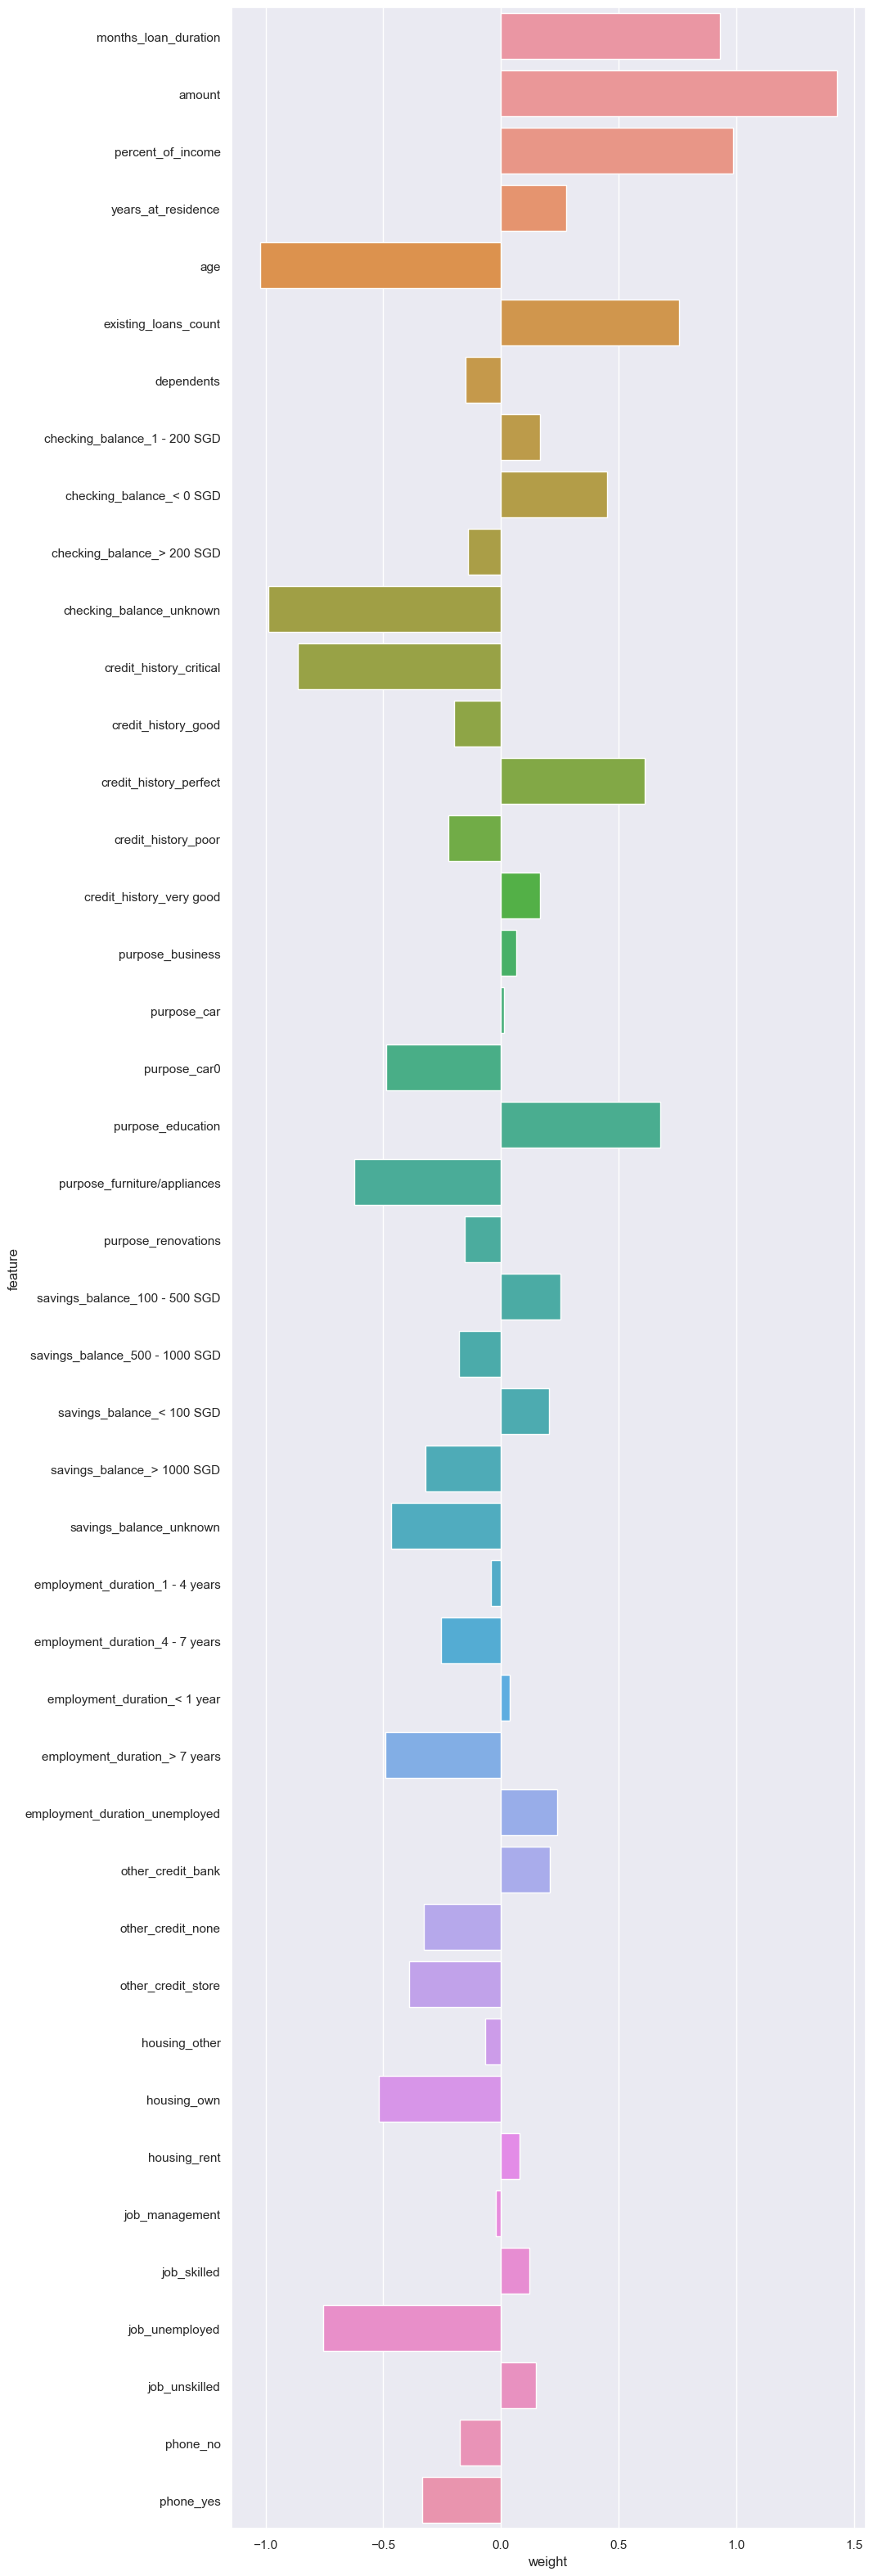

In [120]:
sns.set(rc={'figure.figsize':(10,40)})

sns.barplot(data=weight_df, x='weight',y='feature')


# Making Predictions and Evaluating the Model

In [121]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [122]:
train_prediction = reg.predict(X_train)

In [126]:
train_prediction

array(['yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', '

In [124]:
train_targets

876     no
326     no
381    yes
853    yes
311     no
      ... 
118    yes
334    yes
409    yes
225     no
482     no
Name: default, Length: 600, dtype: object

In [159]:
## we can test the accuracy of the model's predictions by computing the percentage of matching values in train_prediction and train-targets

from sklearn.metrics import accuracy_score

In [160]:
accuracy_score=accuracy_score(train_targets,train_prediction)
print("Accuracy_Score :" ,accuracy_score)

Accuracy_Score : 0.77


In [161]:
## we can output a probabilistic prediction using predict_proba

train_probability = reg.predict_proba(X_train)
train_probability

array([[0.37976217, 0.62023783],
       [0.97784394, 0.02215606],
       [0.27361554, 0.72638446],
       ...,
       [0.80165385, 0.19834615],
       [0.47220265, 0.52779735],
       [0.65737919, 0.34262081]])

**We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix**

In [162]:
from sklearn.metrics import confusion_matrix

confusion_matrix(train_targets,train_prediction,normalize='true')

array([[0.90261283, 0.09738717],
       [0.54189944, 0.45810056]])

In [175]:
## Let's compute the model's accuracy on the validation and test sets too
sns.set(rc={'figure.figsize':(10,10)})
def predict_and_plot(inputs,targets,name=''):
    predict=reg.predict(inputs)
    
    accu = accuracy_score(targets,predict)
    print("Accuracy: {:.2f}%".format(accu *100))
    
    cf=confusion_matrix(targets,predict,normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return predict

Accuracy: 77.00%


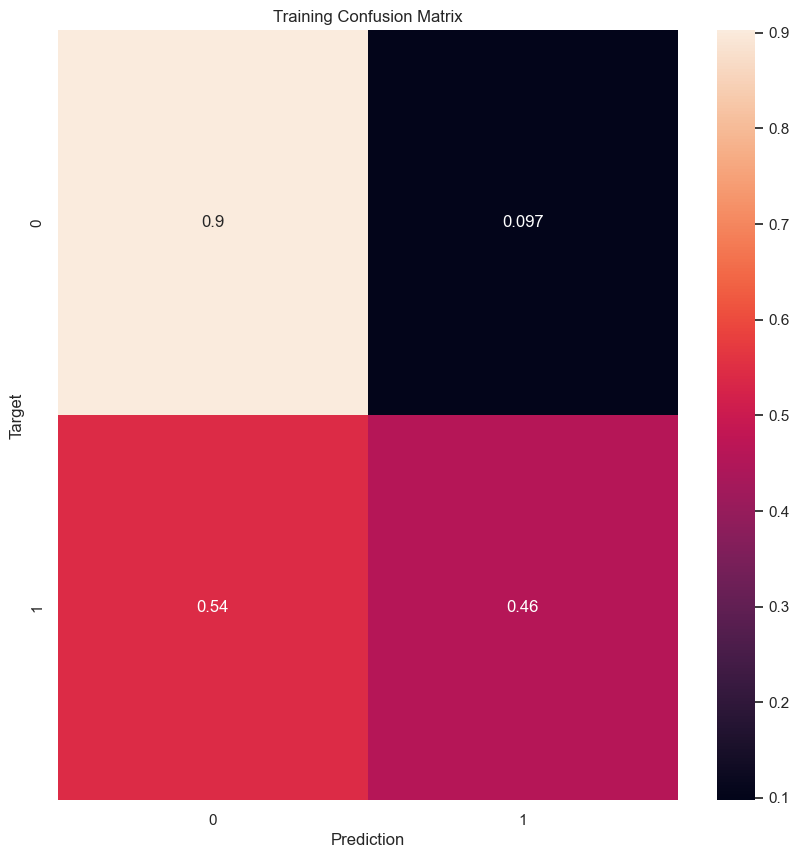

In [176]:
train_predict = predict_and_plot(X_train,train_targets,'Training')

Accuracy: 71.50%


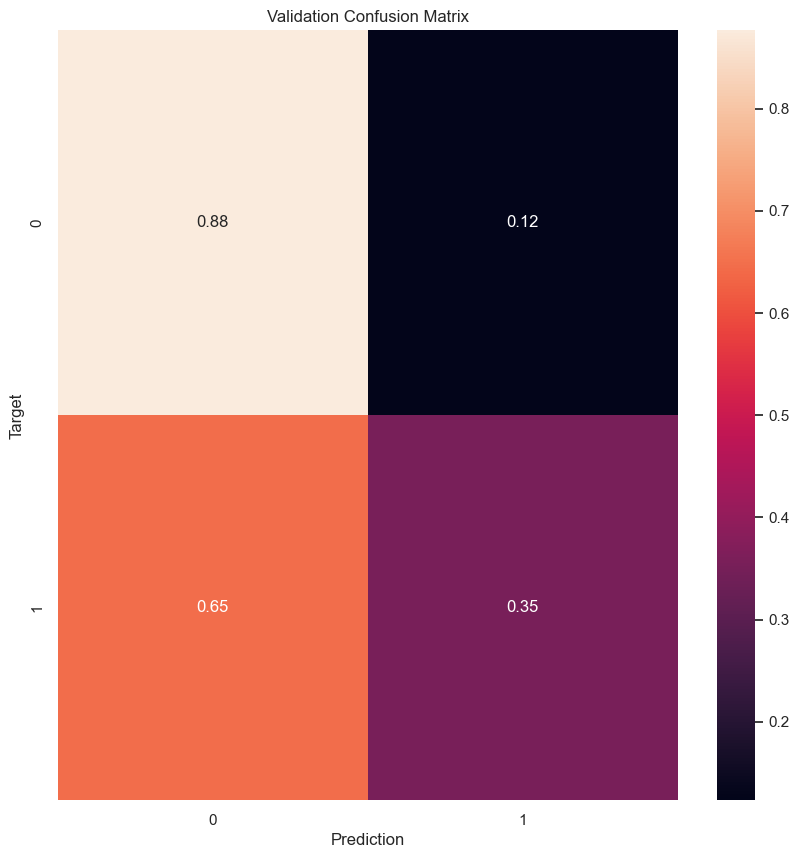

In [177]:
val_predict=predict_and_plot(X_val,val_targets,'Validation')

Accuracy: 76.00%


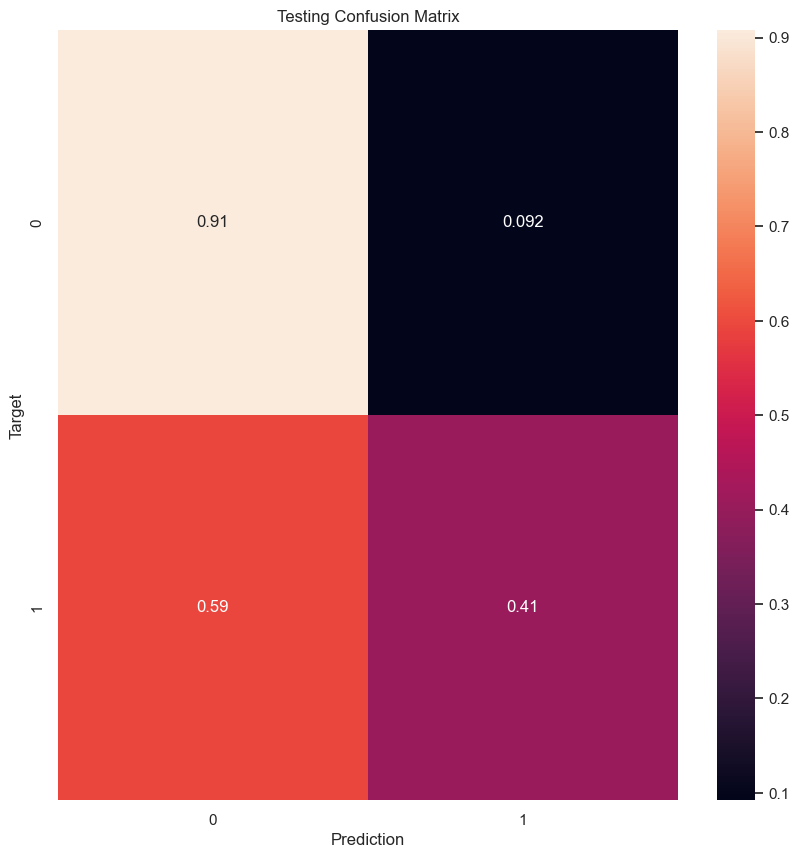

In [178]:
test_predict=predict_and_plot(X_test,test_targets,'Testing')